In [40]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

In [34]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [35]:
cards = pd.read_csv("/home/vcalzada/Work/proyecto/modelos/creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 
scaler = StandardScaler()
x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [36]:
frac

0.018222222222222223

In [37]:
reduccion={'pca':{'finalDim':[2,4,6]},
           'encoder':{'capas':[[512,128]], 'finalDim':[2,4,6], 'batch_size':16, 'epochs':20 }}
#reduccion={'encoder':{'capas':[[30,30], [1024,32,32]], 'finalDim':[2,5,10], 'batch_size':8, 'epochs':15 }}

In [38]:
#modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
#          'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':0.15, 'epochs':100}}
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
           'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':0.15, 'epochs':100}}
#           'dbscan':{'eps':0.5,'min_samples':[8,14,20]}}

In [43]:
rn.set_seed(0)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

Epoch 1/20
1719/1719 [==============================] - 51s 18ms/step - loss: 0.9346 - val_loss: 0.9147
Epoch 2/20
1719/1719 [==============================] - 27s 15ms/step - loss: 0.9087 - val_loss: 0.9062
Epoch 3/20
1719/1719 [==============================] - 26s 15ms/step - loss: 0.9043 - val_loss: 0.9036
Epoch 4/20
1719/1719 [==============================] - 25s 15ms/step - loss: 0.9020 - val_loss: 0.9077
Epoch 5/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.9042 - val_loss: 0.8997
Epoch 6/20
1719/1719 [==============================] - 28s 16ms/step - loss: 0.8993 - val_loss: 0.8997
Epoch 7/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.8999 - val_loss: 0.8974
Epoch 8/20
1719/1719 [==============================] - 28s 16ms/step - loss: 0.8954 - val_loss: 0.8957
Epoch 9/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.8971 - val_loss: 0.8980
Epoch 10/20
1719/1719 [==============================] - 30s 17m

In [44]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               15872     
                                                                 
 dense_56 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_57 (Dense)            (None, 128)               640       
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dense_59 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

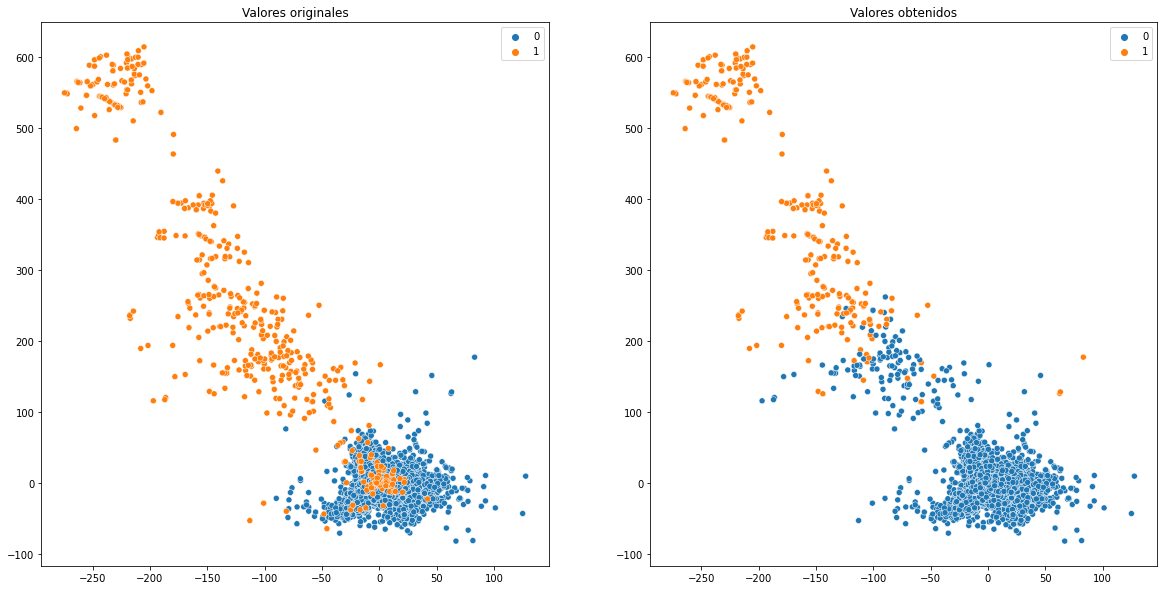

1
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.01
___________________________________________________________________________ 
 Precision: 0.8836363636363637 
 Recall: 0.49390243902439024

|                                                                         |


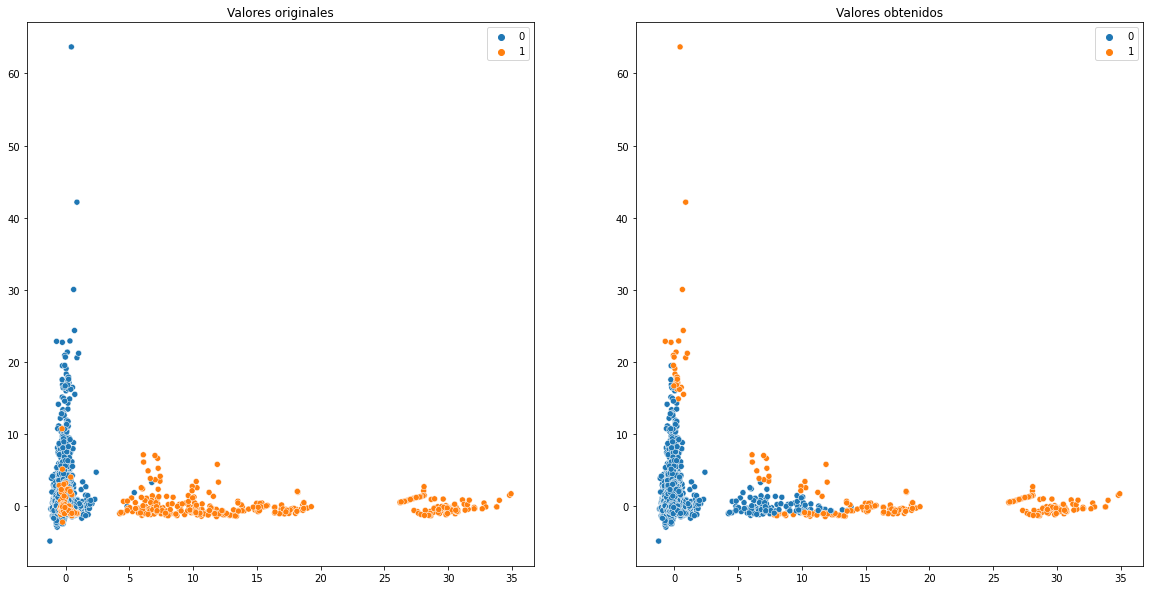

2
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 4
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.01
___________________________________________________________________________ 
 Precision: 0.8363636363636363 
 Recall: 0.46747967479674796

|                                                                         |


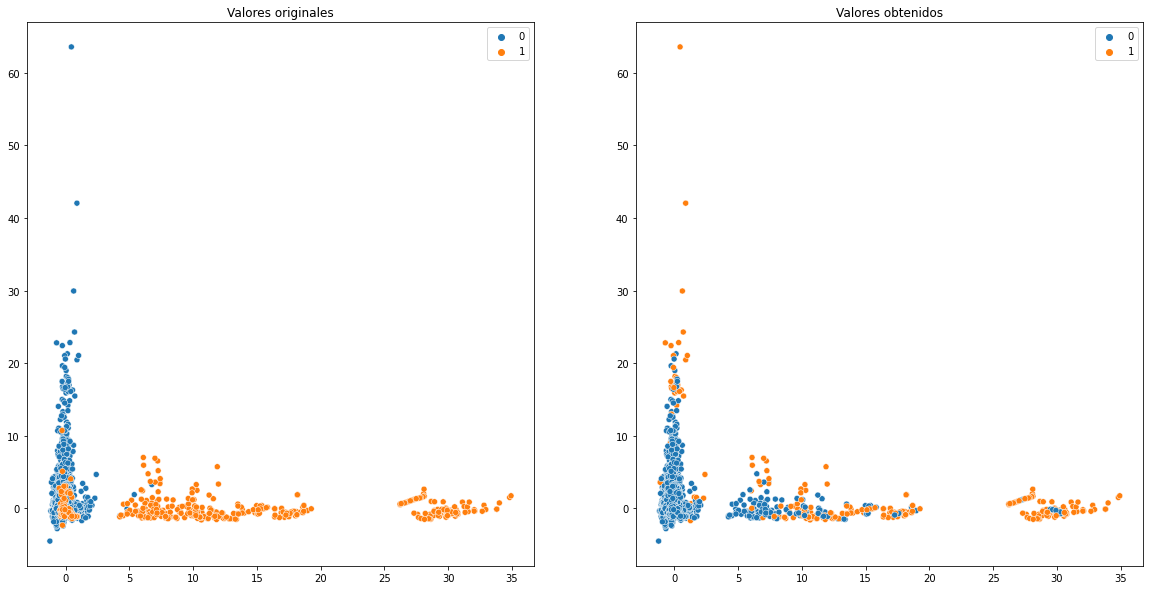

3
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               15872     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 6)                 774       
                                                                 
 dense_62 (Dense)            (None, 128)               896       
                                                                 
 dense_63 (Dense)            (None, 512)               66048     
                                                                 
 dense_64 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,644
Trainable params: 164,644
Non

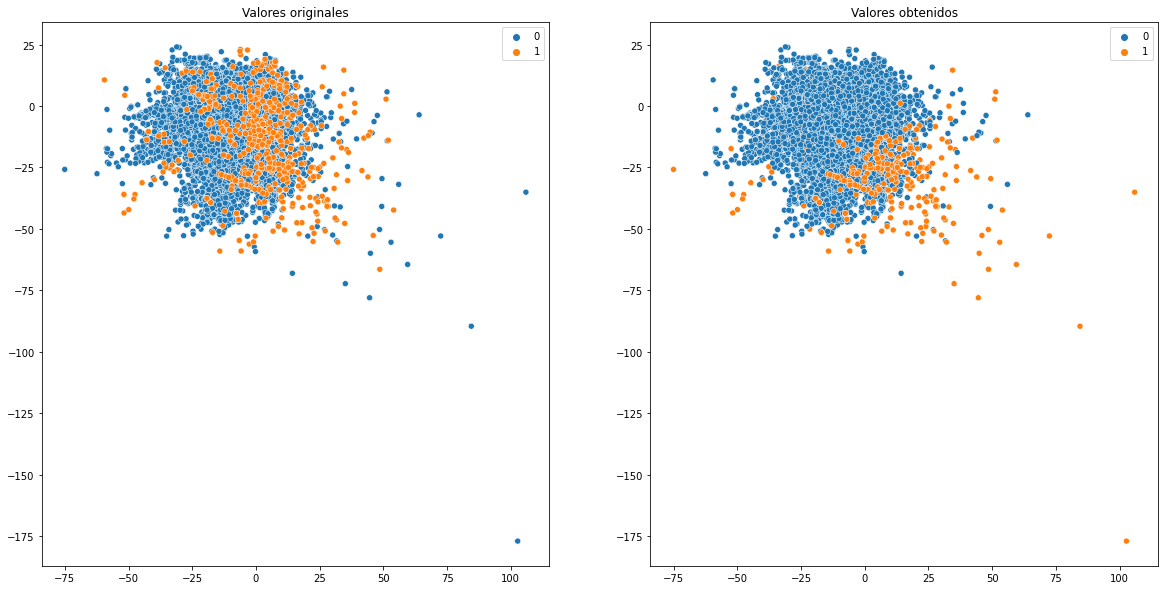

4
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               15872     
                                                                 
 dense_56 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_57 (Dense)            (None, 128)               640       
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dense_59 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

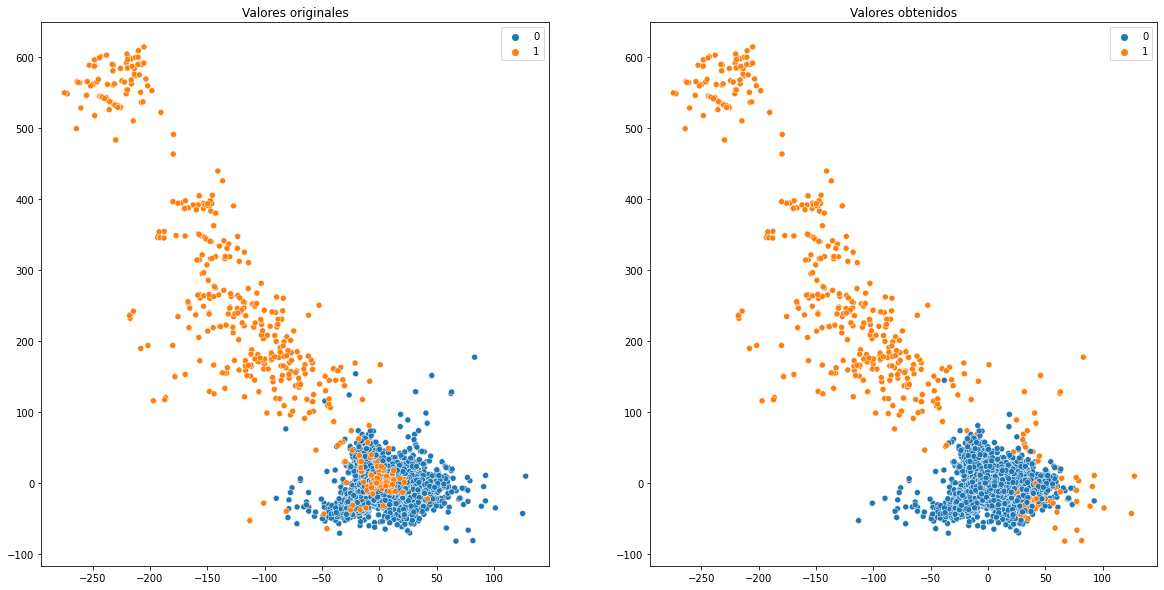

5
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               15872     
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 512)               66048     
                                                                 
 dense_54 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

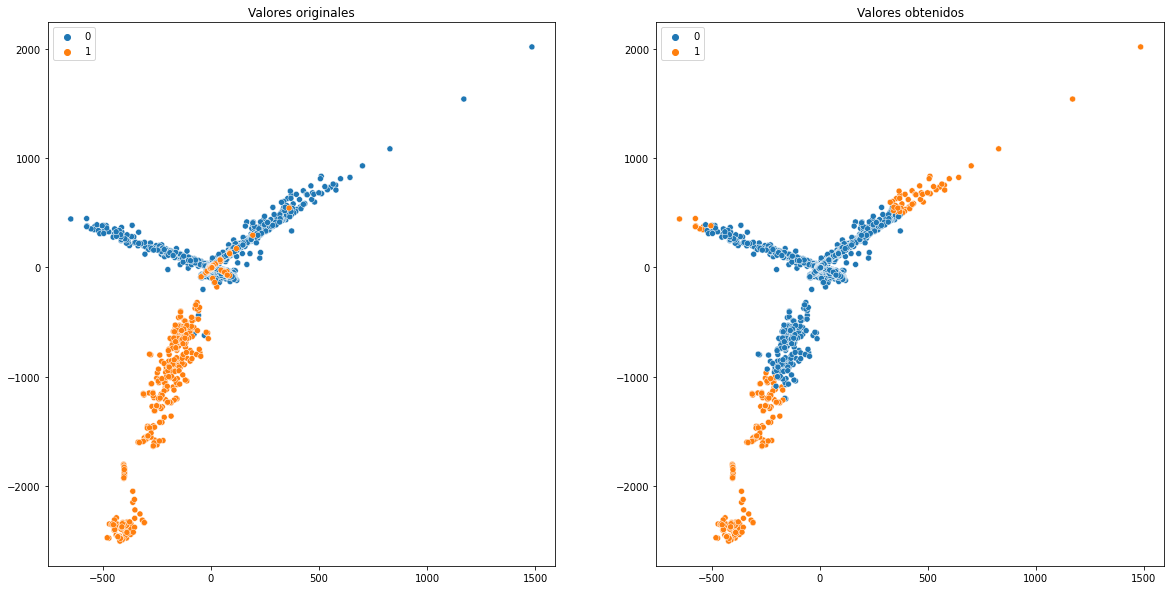

6
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.018222222222222223
___________________________________________________________________________ 
 Precision: 0.7704590818363274 
 Recall: 0.7845528455284553

|                                                                         |


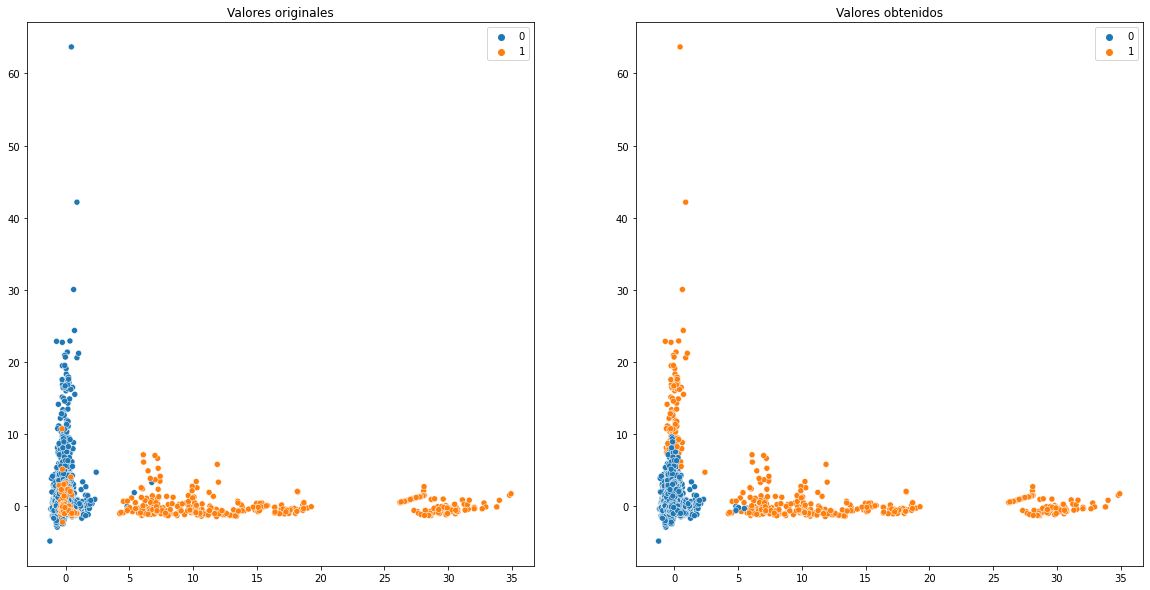

7
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 4
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.018222222222222223
___________________________________________________________________________ 
 Precision: 0.6786427145708582 
 Recall: 0.6910569105691057

|                                                                         |


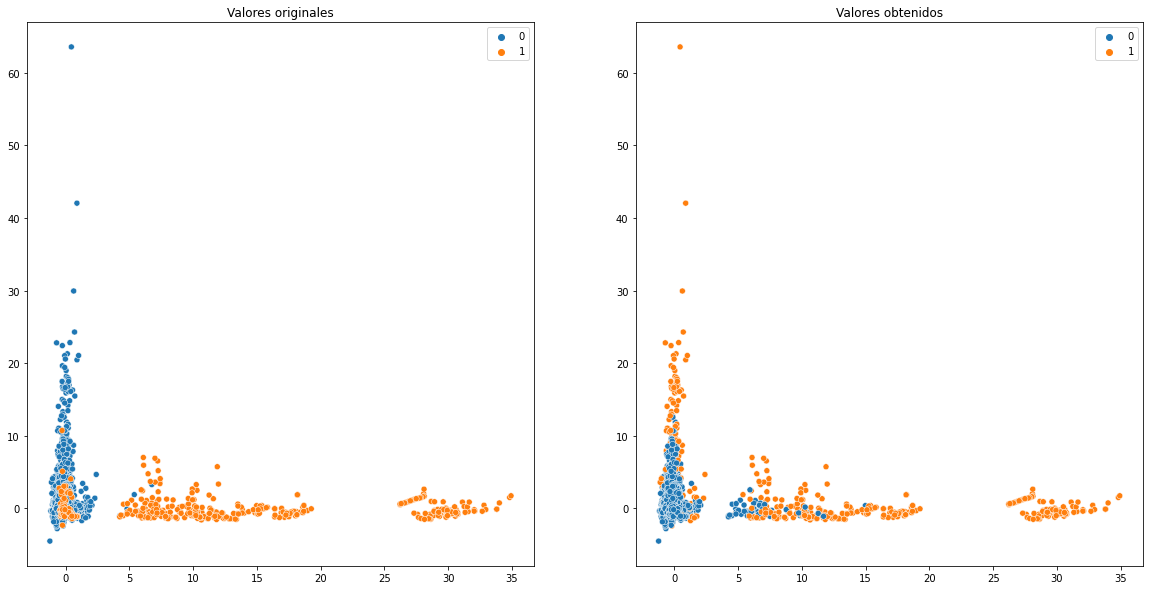

8
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 6
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.01
___________________________________________________________________________ 
 Precision: 0.6436363636363637 
 Recall: 0.3597560975609756

|                                                                         |


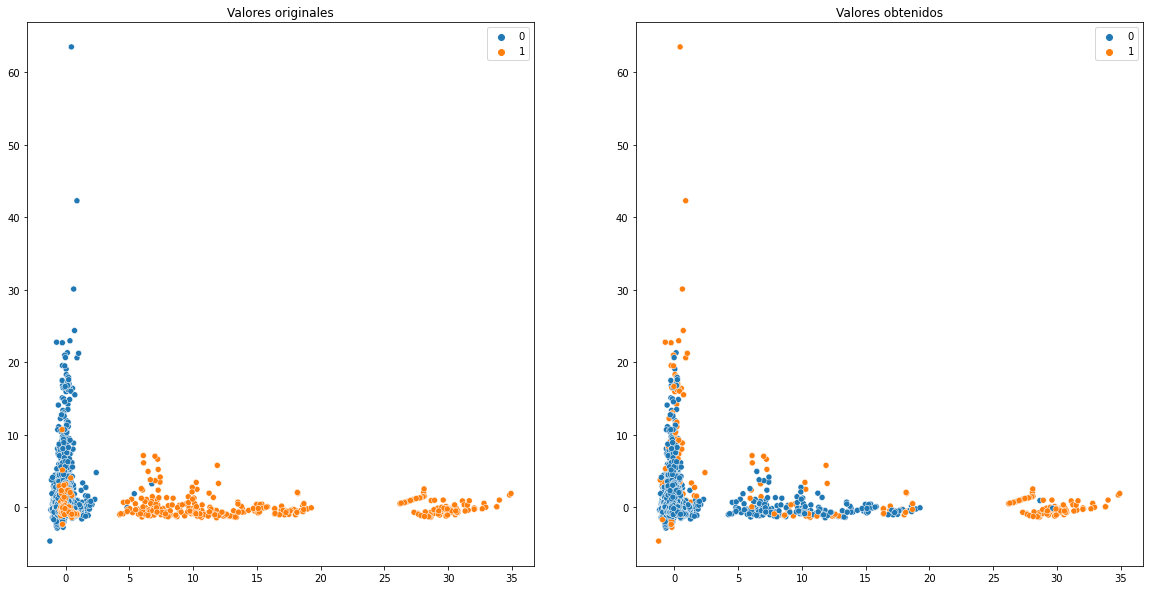

9
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               15872     
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 512)               66048     
                                                                 
 dense_54 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

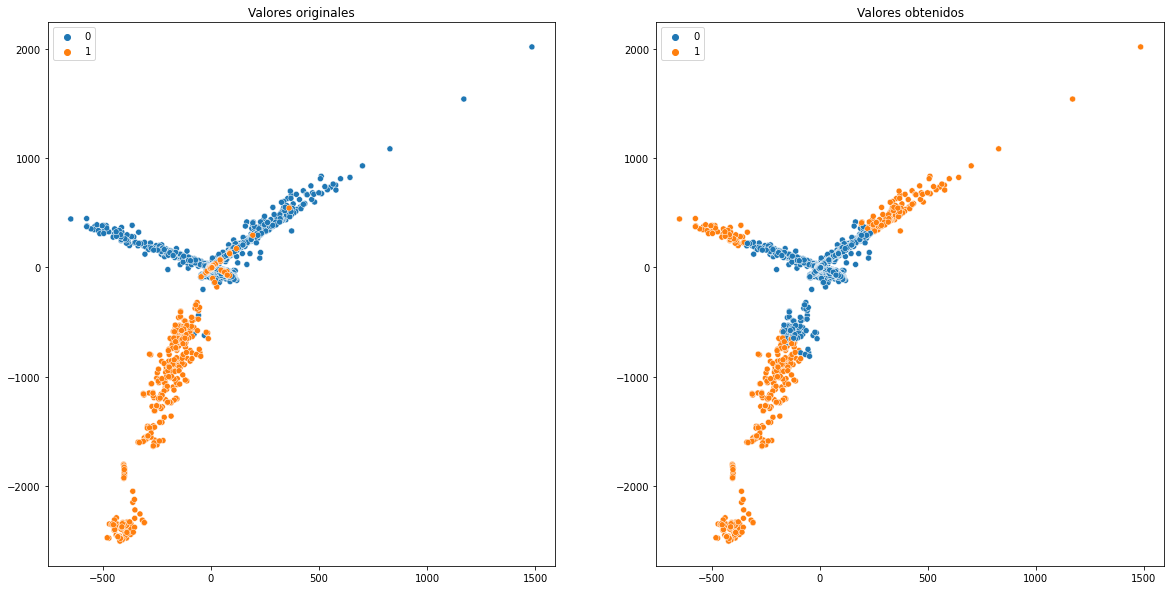

10
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               15872     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 6)                 774       
                                                                 
 dense_62 (Dense)            (None, 128)               896       
                                                                 
 dense_63 (Dense)            (None, 512)               66048     
                                                                 
 dense_64 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,644
Trainable params: 164,644
No

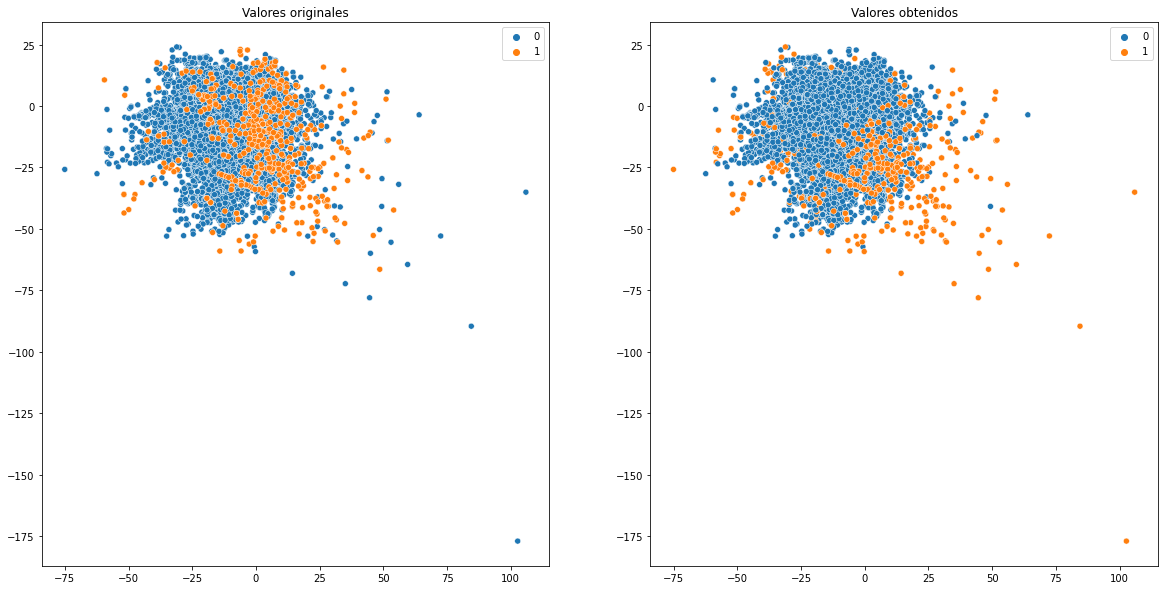

11
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 6
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.018222222222222223
___________________________________________________________________________ 
 Precision: 0.5429141716566867 
 Recall: 0.5528455284552846

|                                                                         |


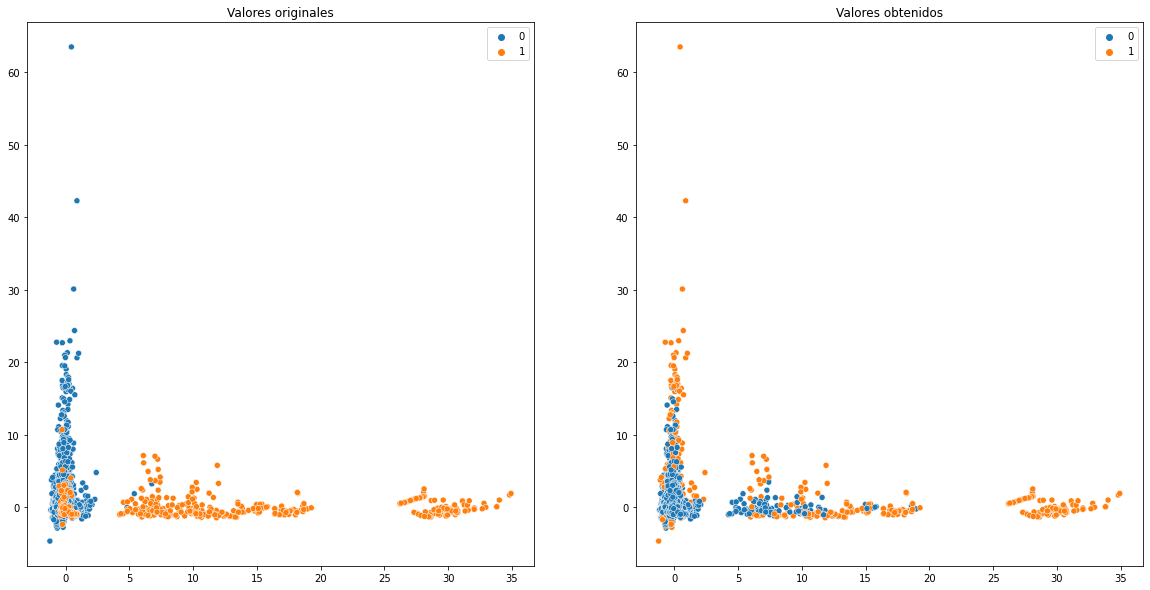

12
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 6
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> auto
___________________________________________________________________________ 
 Precision: 0.25610519724483405 
 Recall: 0.8313008130081301

|                                                                         |


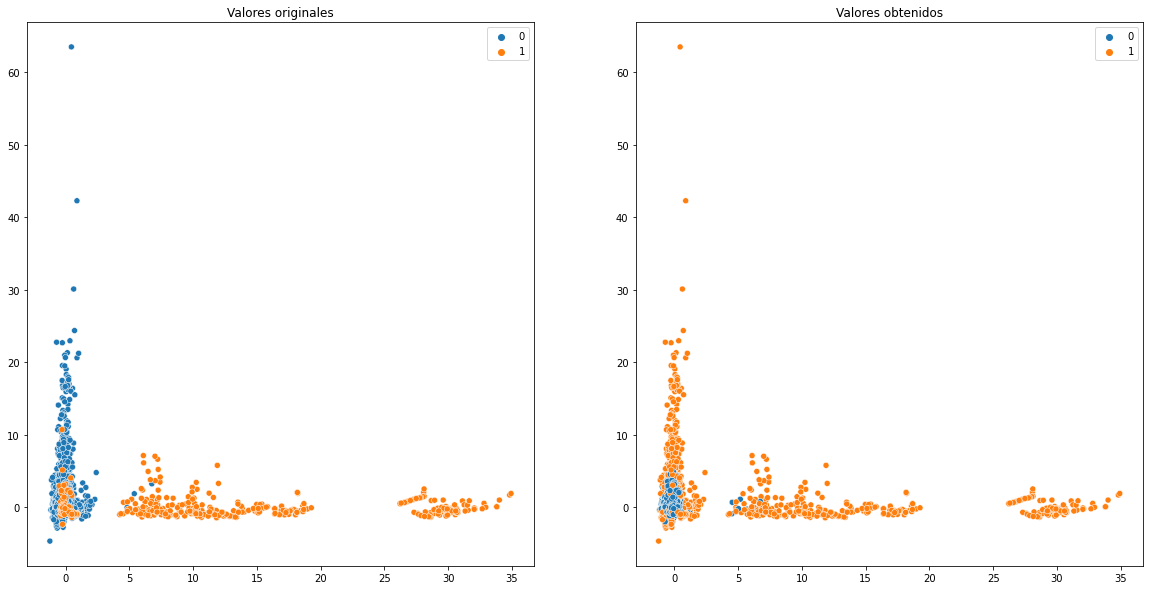

13
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 4
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> auto
___________________________________________________________________________ 
 Precision: 0.23615819209039549 
 Recall: 0.8495934959349594

|                                                                         |


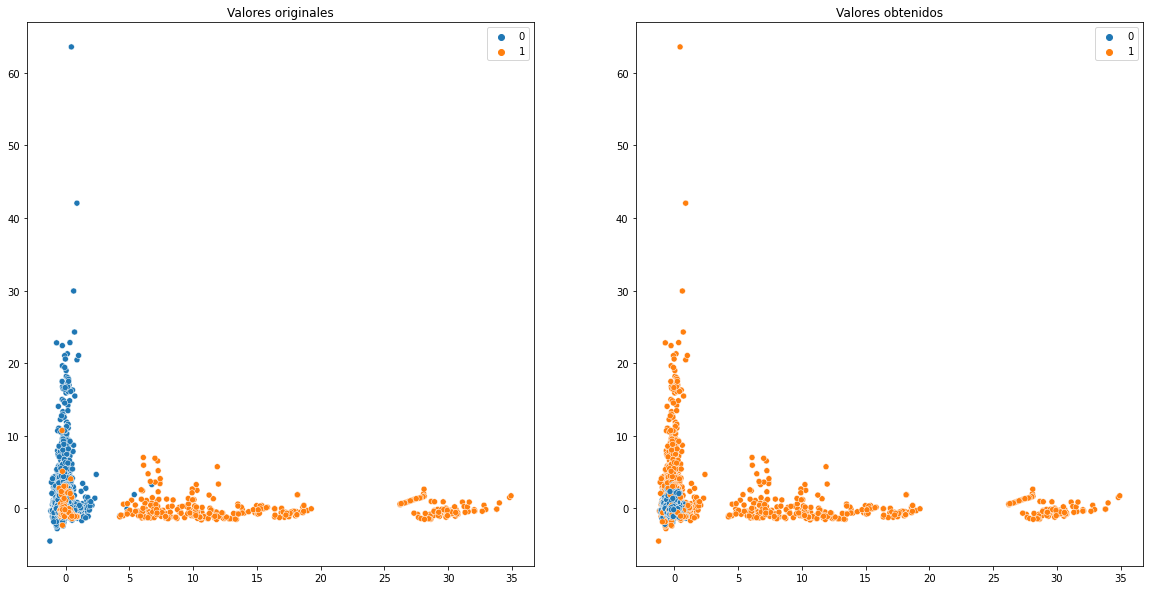

14
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               15872     
                                                                 
 dense_56 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_57 (Dense)            (None, 128)               640       
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dense_59 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
No

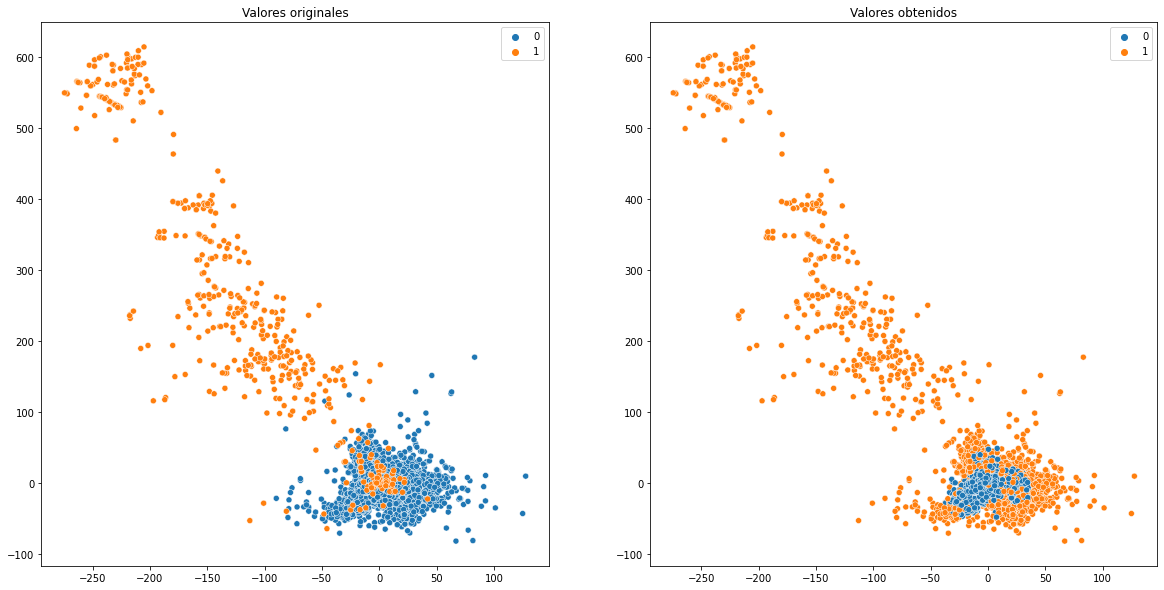

15
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> auto
___________________________________________________________________________ 
 Precision: 0.17605340008343762 
 Recall: 0.8577235772357723

|                                                                         |


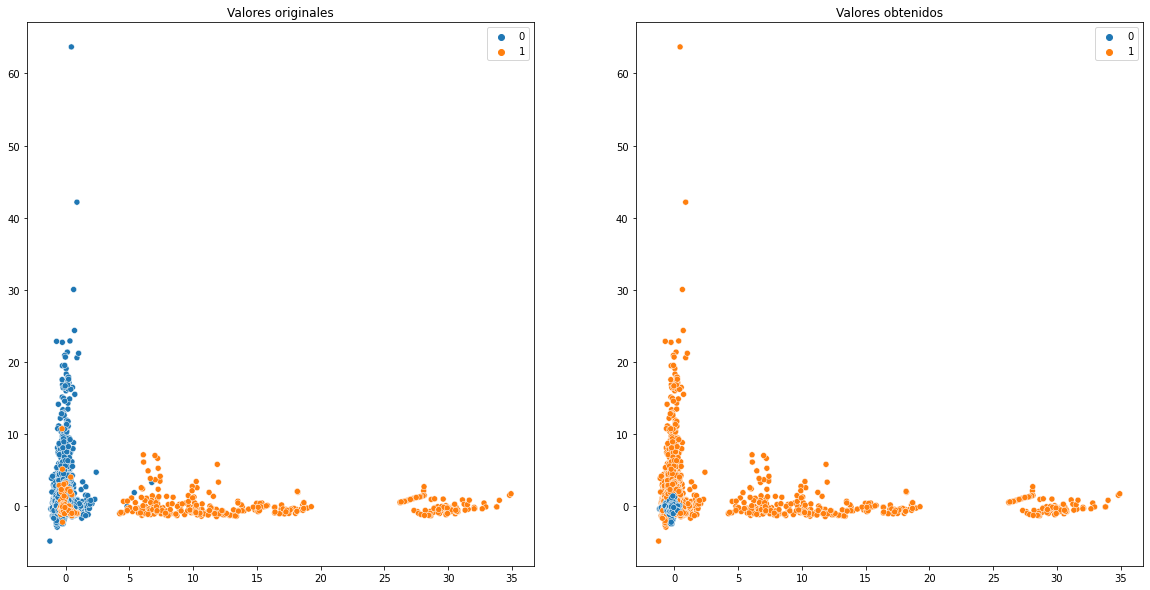

16
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               15872     
                                                                 
 dense_56 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_57 (Dense)            (None, 128)               640       
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dense_59 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
No

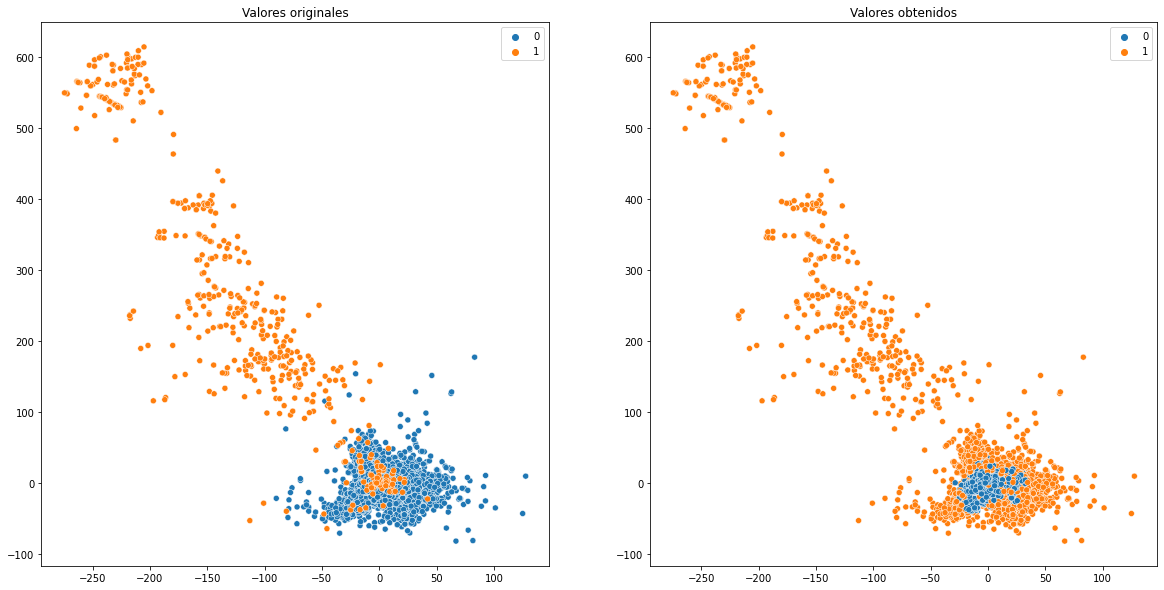

17
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 6
___________________________________________________________________________
___________________________________________________________________________
Analisis --> som
	Sigma --> 0.2
	Learning Rate --> 0.2
	Funcion de vecinos --> gaussian
	Porcentage de outliers --> 0.15
	Epocas --> 100
___________________________________________________________________________ 
 Precision: 0.15672727272727272 
 Recall: 0.8760162601626016

|                                                                         |


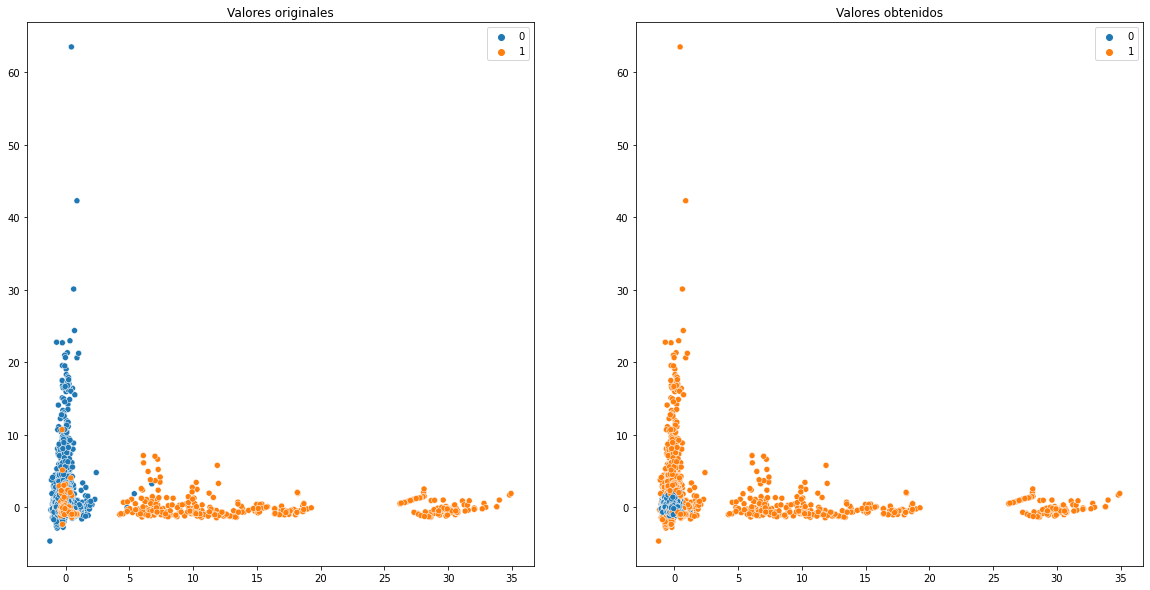

18
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________
___________________________________________________________________________
Analisis --> som
	Sigma --> 0.2
	Learning Rate --> 0.2
	Funcion de vecinos --> gaussian
	Porcentage de outliers --> 0.15
	Epocas --> 100
___________________________________________________________________________ 
 Precision: 0.15563636363636363 
 Recall: 0.8699186991869918

|                                                                         |


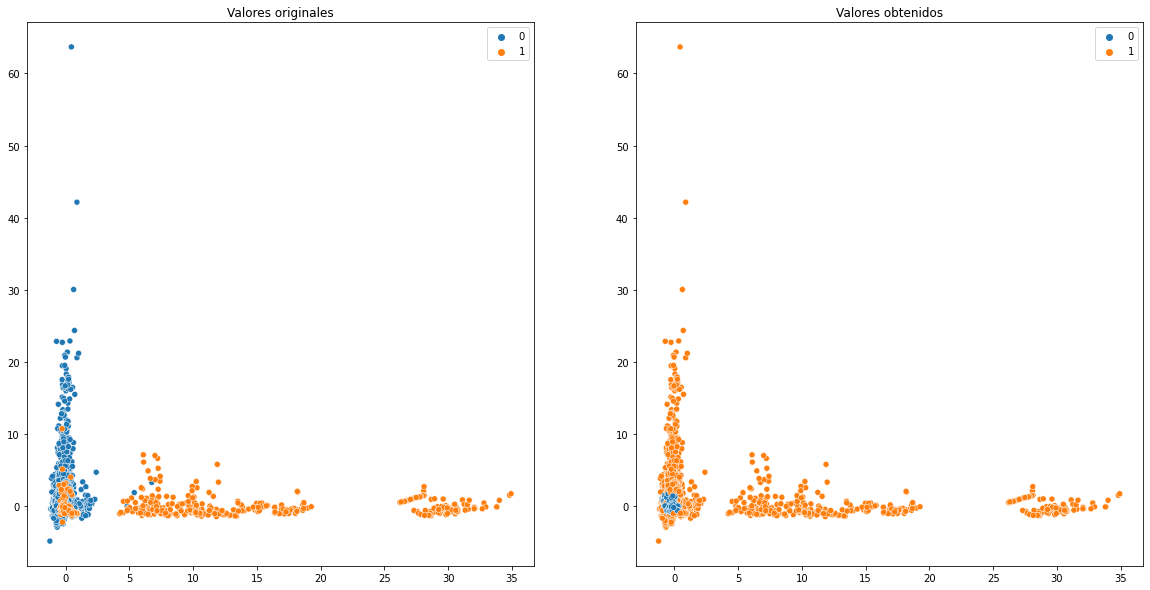

19
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 4
___________________________________________________________________________
___________________________________________________________________________
Analisis --> som
	Sigma --> 0.2
	Learning Rate --> 0.2
	Funcion de vecinos --> gaussian
	Porcentage de outliers --> 0.15
	Epocas --> 100
___________________________________________________________________________ 
 Precision: 0.15454545454545454 
 Recall: 0.8638211382113821

|                                                                         |


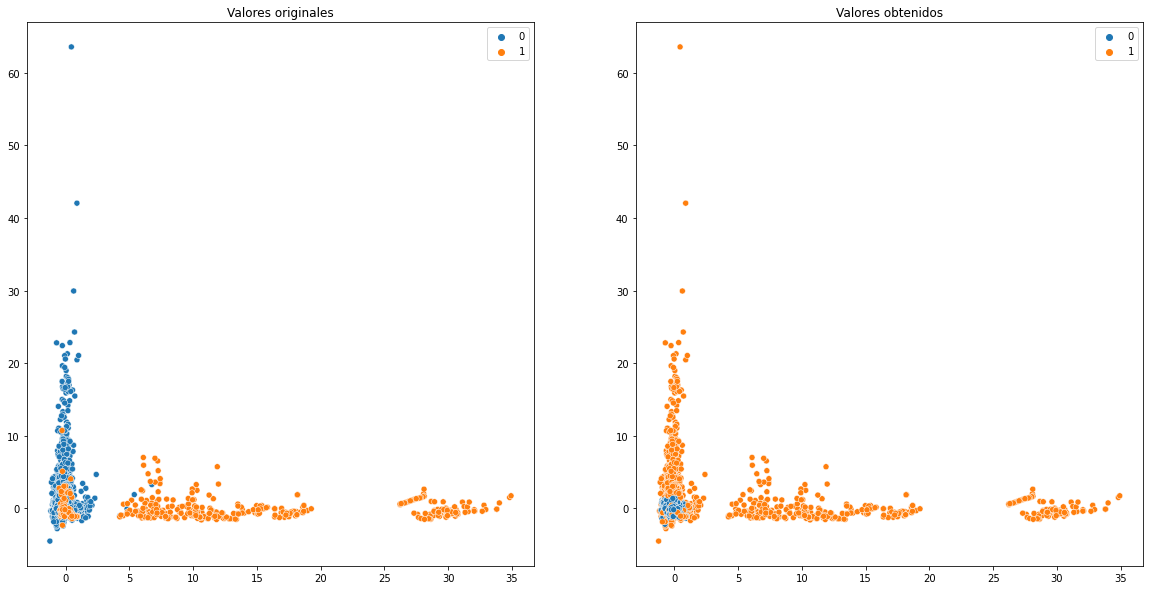

20
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               15872     
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 512)               66048     
                                                                 
 dense_54 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
No

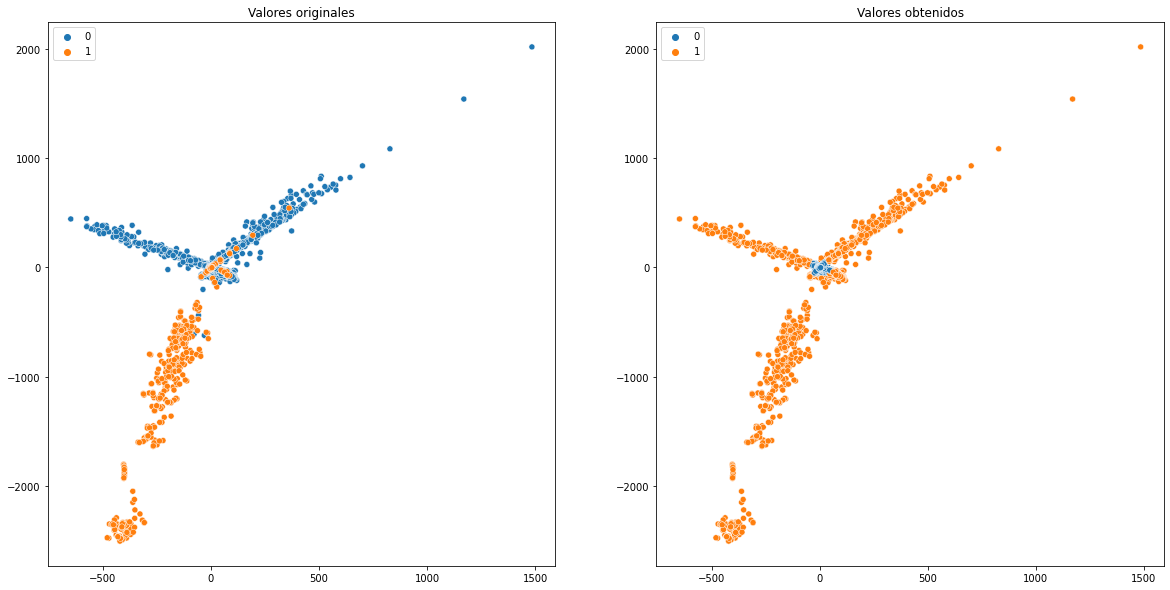

21
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               15872     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 6)                 774       
                                                                 
 dense_62 (Dense)            (None, 128)               896       
                                                                 
 dense_63 (Dense)            (None, 512)               66048     
                                                                 
 dense_64 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,644
Trainable params: 164,644
No

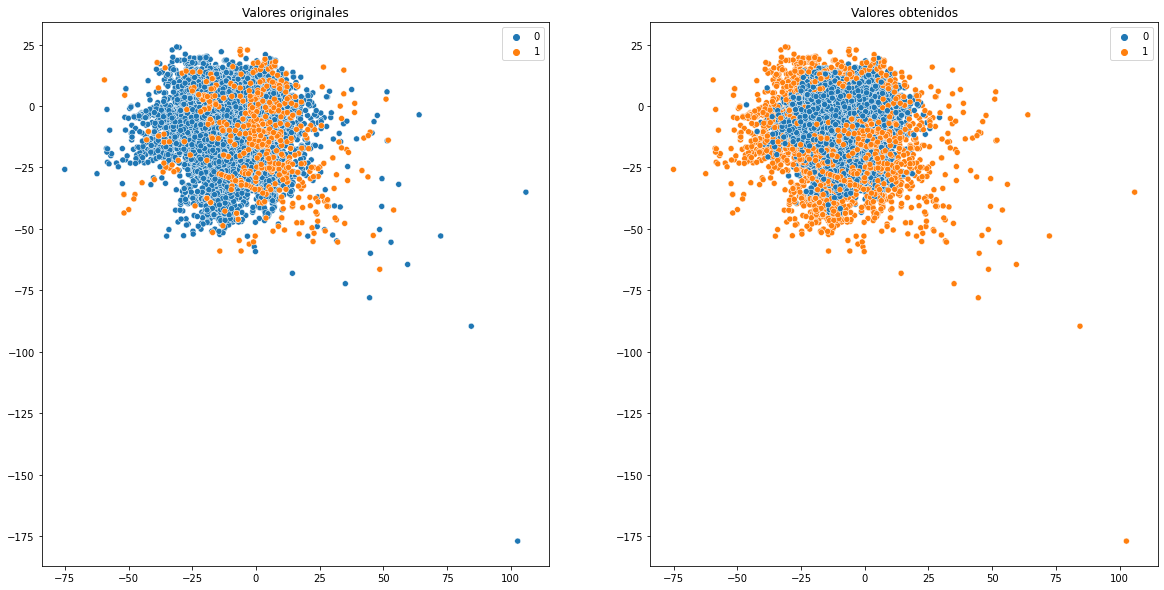

22
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               15872     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 6)                 774       
                                                                 
 dense_62 (Dense)            (None, 128)               896       
                                                                 
 dense_63 (Dense)            (None, 512)               66048     
                                                                 
 dense_64 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,644
Trainable params: 164,644
No

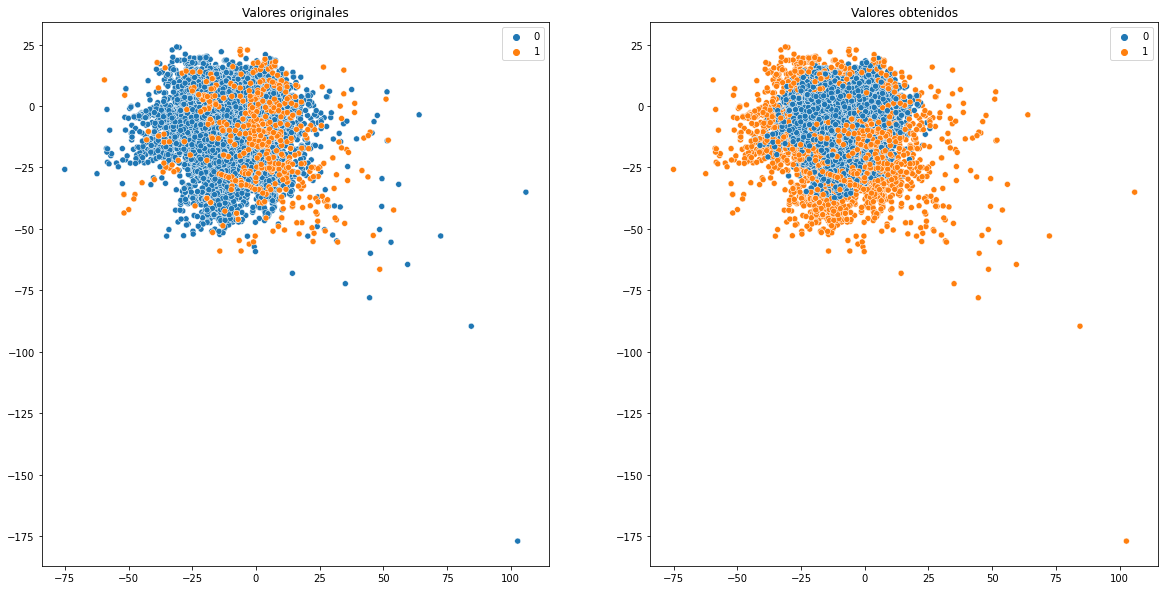

23
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               15872     
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 512)               66048     
                                                                 
 dense_54 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
No

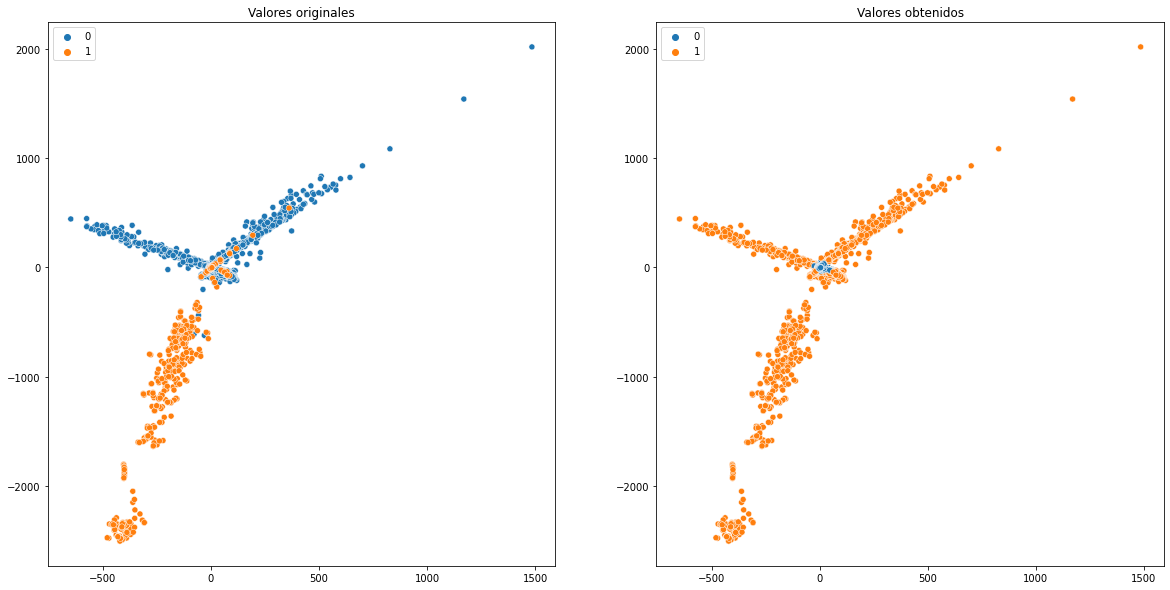

24
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 6
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.2
___________________________________________________________________________ 
 Precision: 0.08274231678486997 
 Recall: 0.9247967479674797

|                                                                         |


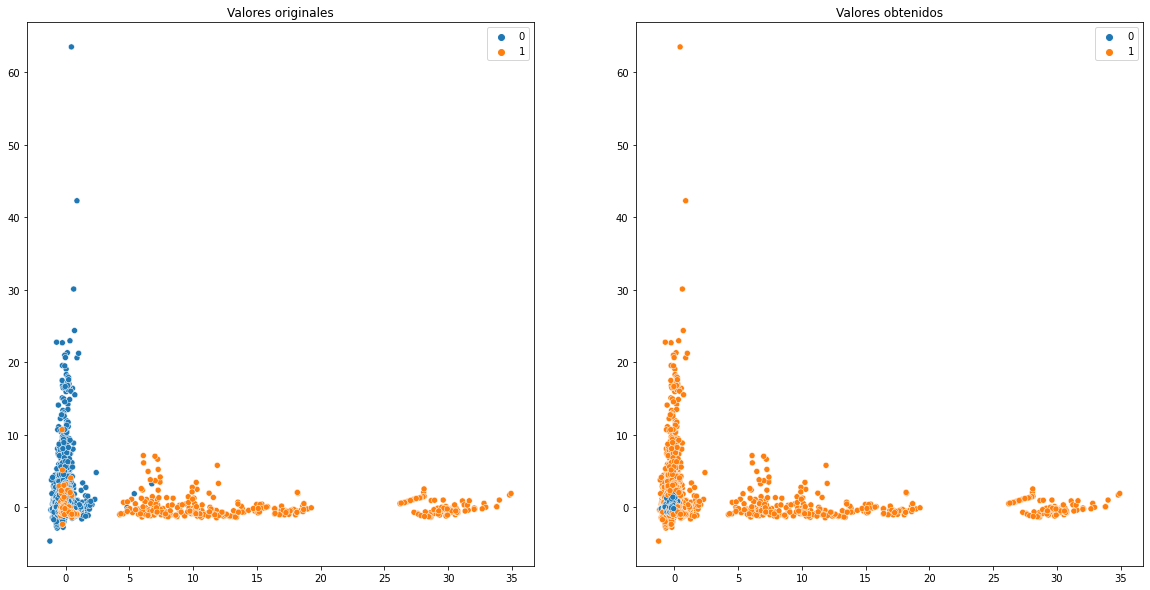

25
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               15872     
                                                                 
 dense_56 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_57 (Dense)            (None, 128)               640       
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dense_59 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
No

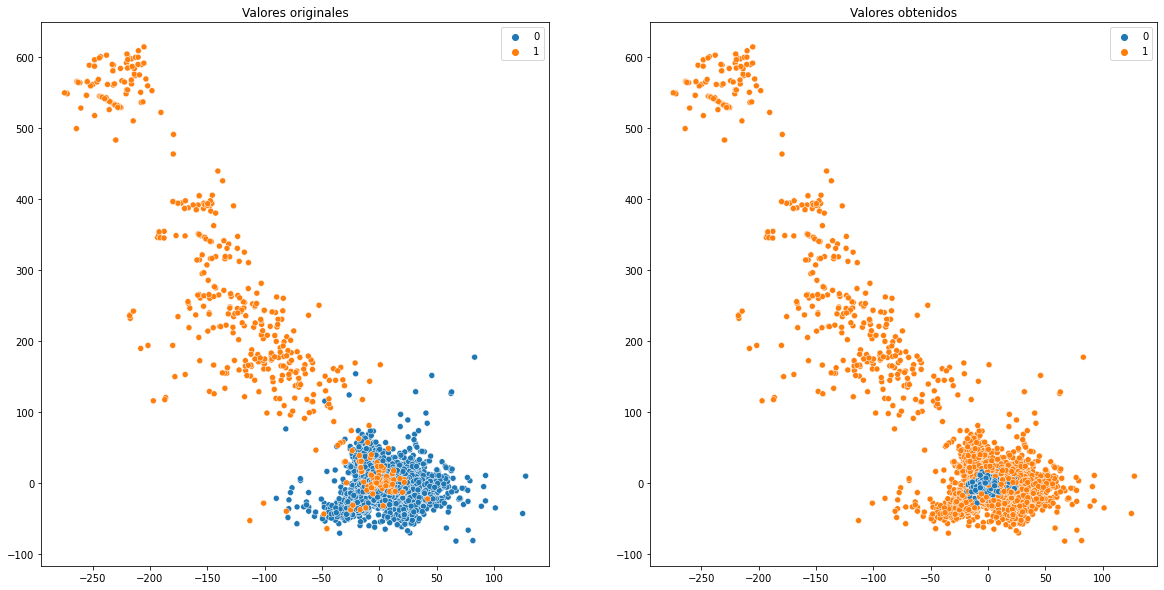

26
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.2
___________________________________________________________________________ 
 Precision: 0.0812875068194217 
 Recall: 0.9085365853658537

|                                                                         |


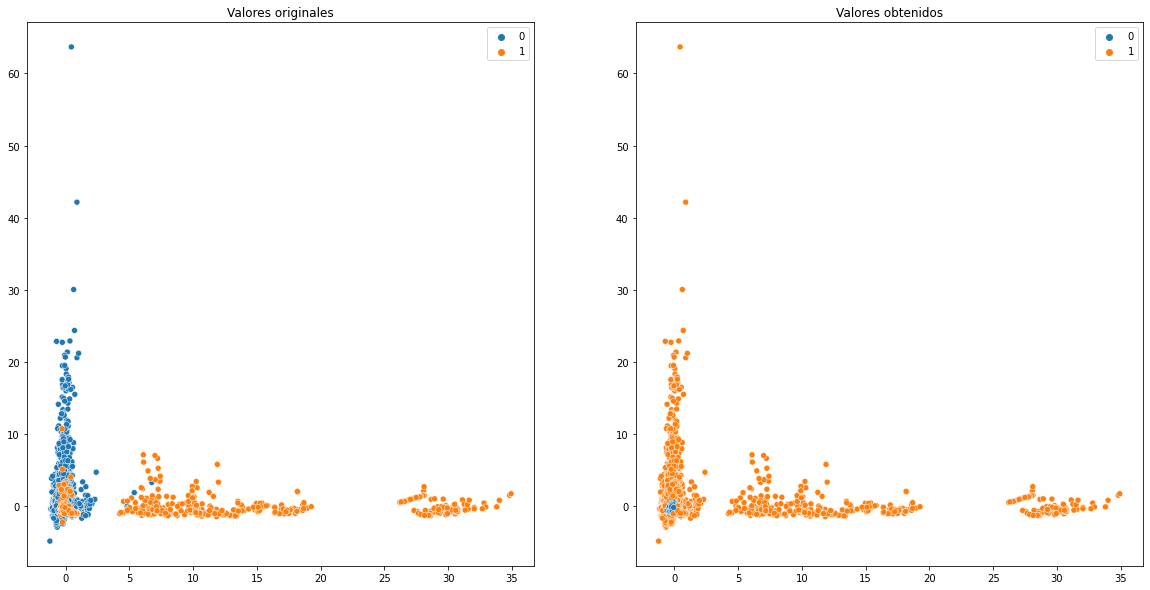

27
___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 4
___________________________________________________________________________
___________________________________________________________________________
Analisis --> isoForest
	Contaminacion --> 0.2
___________________________________________________________________________ 
 Precision: 0.0812875068194217 
 Recall: 0.9085365853658537

|                                                                         |


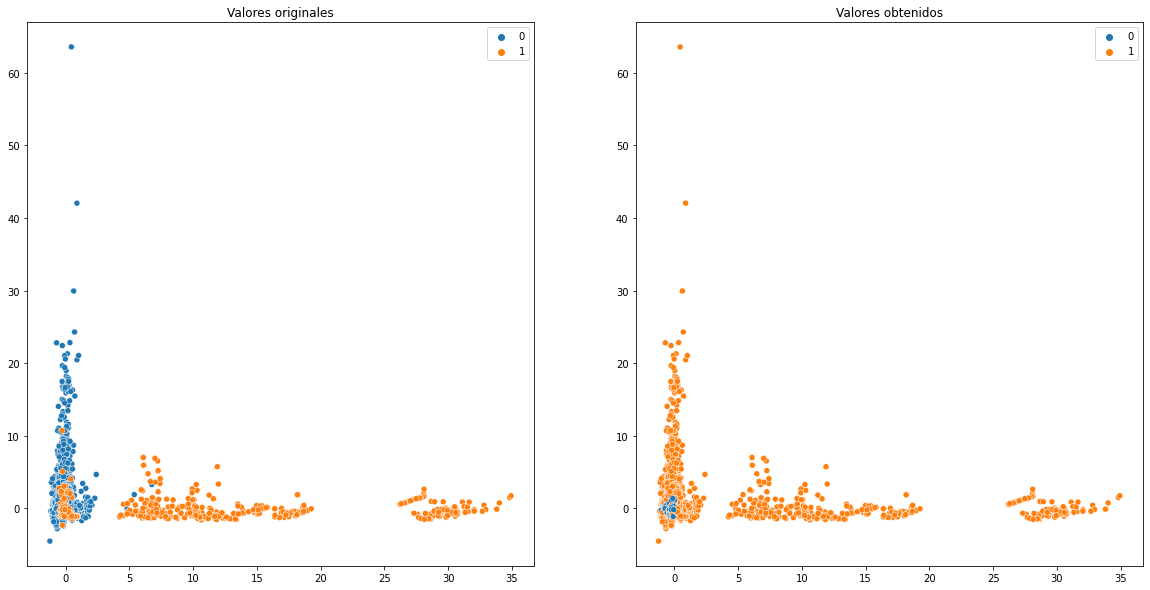

28
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               15872     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 6)                 774       
                                                                 
 dense_62 (Dense)            (None, 128)               896       
                                                                 
 dense_63 (Dense)            (None, 512)               66048     
                                                                 
 dense_64 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,644
Trainable params: 164,644
No

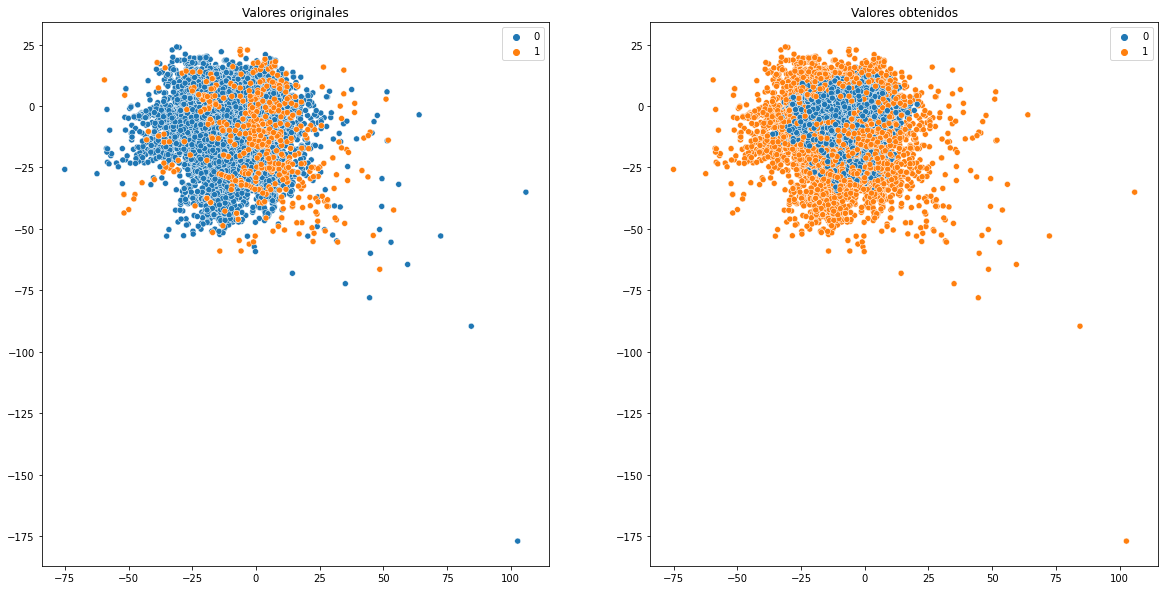

29
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               15872     
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 512)               66048     
                                                                 
 dense_54 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
No

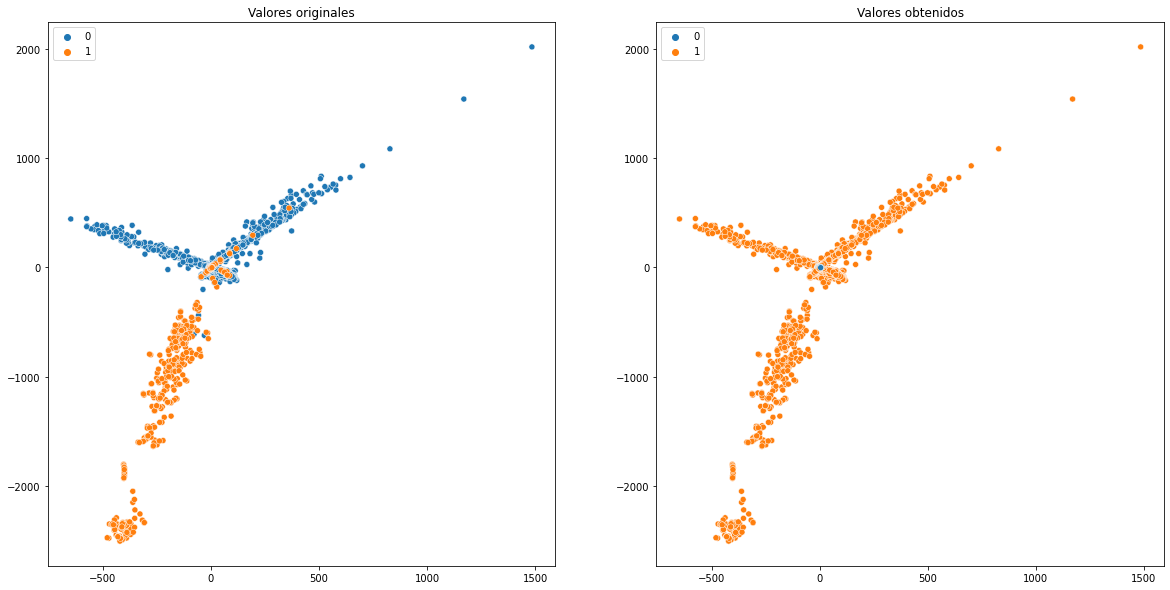

In [45]:
new = []
for n in range(0,len(obj)):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred, engine='seaborn')

In [8]:
with open("modelos.csv","w") as f:
    f.write("Ndata;reduccion;analisis;precision;recall\n")

In [46]:
parrafo = ''
for o in obj:
    fila=''
    if o.precision() > 0.7:
        
        if o.recall() > 0.6:
            
            fila+=''+str(x.shape[0])+';'
            if o.reduccion.reductionN == 'pca':
                fila += '{"type":"pca","n_components":'+str(o.reduccion.finalDim)+'};'
                
            elif o.reduccion.reductionN == 'encoder':
                fila += '{"type":"encoder","capas":'+str(o.reduccion.capas)+',"finalDim":'+str(o.reduccion.finalDim)+',"batch_size":'+str(o.reduccion.batch_size)+',"epochs":'+str(o.reduccion.epochs)+'};'
            if o.analisis.modeloN == 'lof':
                fila += '{"type":"lof","n_neighbors":'+str(o.analisis.n_neighbors)+',"contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'isoForest':
                fila += '{"type":"isoForest","contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'som':
                fila += '{"type":"som","sigma":'+str(o.analisis.sigma)+',"learning_rate":'+str(o.analisis.learning_rate)+',"neighborhood_function":'+o.analisis.neighborhood_function+',"outliers_percentage":'+str(o.analisis.outliers_percentage)+',"epochs":'+str(o.analisis.epochs)+'};'
            elif o.analisis.modeloN == 'dbscan':
                fila += '{"type":"som","eps":'+str(o.analisis.eps)+',"min_samples":'+str(o.analisis.min_samples)+'};'
            fila += f'{o.precision()};{o.recall()}'
        else:
            continue
    else:
        break
            
    parrafo += fila
    parrafo += '\n'
        

In [47]:
print(parrafo)

27492;{"type":"encoder","capas":[512, 128],"finalDim":4,"batch_size":16,"epochs":20};{"type":"isoForest","contamination":0.018222222222222223};0.7884231536926147;0.8028455284552846
27492;{"type":"pca","n_components":2};{"type":"isoForest","contamination":0.018222222222222223};0.7704590818363274;0.7845528455284553



In [48]:
with open("modelos.csv","a") as f:
    
    f.write(parrafo)

In [3]:
import pandas as pd

In [49]:
mod = pd.read_csv("modelos.csv",sep=";")
mod.head()

,Ndata,reduccion,analisis,precision,recall
0,27492,"{""type"":""encoder"",""capas"":[1024, 32, 32],""fina...","{""type"":""isoForest"",""contamination"":0.01822222...",0.776000,0.788618
1,27492,"{""type"":""encoder"",""capas"":[30, 1024, 128, 8],""...","{""type"":""isoForest"",""contamination"":0.01822222...",0.746507,0.760163
2,27492,"{""type"":""encoder"",""capas"":[512, 128],""finalDim...","{""type"":""isoForest"",""contamination"":0.01822222...",0.788423,0.802846
3,27492,"{""type"":""pca"",""n_components"":2}","{""type"":""isoForest"",""contamination"":0.01822222...",0.770459,0.784553


In [10]:
mod.iloc[0,:]

Ndata                                                    27492
reduccion    {"type":"encoder","capas":[1024, 32, 32],"fina...
analisis     {"type":"isoForest","contamination":0.01822222...
precision                                                0.776
recall                                                0.788618
Name: 0, dtype: object